In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 

import warnings 
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"C:\Users\Itvedant CR3-08\Documents\DILIP\MLmain\ML_Files\diabeties.csv")
df.head(2)

,pregnant,glocose,bp,skin,insulin,bmi,predigree,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   glocose    768 non-null    int64  
 2   bp         768 non-null    int64  
 3   skin       768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   bmi        768 non-null    float64
 6   predigree  768 non-null    float64
 7   age        768 non-null    int64  
 8   target     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df["target"].value_counts()

0    500
1    268
Name: target, dtype: int64

In [7]:
features=df.iloc[:,:-1]
target=df.iloc[:,-1]

In [12]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(features,target,random_state=1,test_size=0.3,stratify=target)



In [13]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

In [14]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

ac= accuracy_score(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)

print (f"AS:{ac}\n CM:\n{cm}\n CR:{cr}")

AS:0.7662337662337663
 CM:
[[132  18]
 [ 36  45]]
 CR:              precision    recall  f1-score   support

           0       0.79      0.88      0.83       150
           1       0.71      0.56      0.63        81

    accuracy                           0.77       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.76      0.77      0.76       231



In [15]:
train=lr.score(xtrain,ytrain)
test=lr.score(xtest,ytest)
print(f"TS:{train}\nTE:{test} ")

TS:0.7821229050279329
TE:0.7662337662337663 


In [16]:
print(f"Actual Values {ytest[:25].values}")
print(f"Predicted Values {ypred[:25]}")


Actual Values [1 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1]
Predicted Values [0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1]


In [17]:
lr.predict_proba(xtest)

array([[0.79786465, 0.20213535],
       [0.20098394, 0.79901606],
       [0.67719063, 0.32280937],
       [0.96066319, 0.03933681],
       [0.76565645, 0.23434355],
       [0.76214363, 0.23785637],
       [0.05928372, 0.94071628],
       [0.57735512, 0.42264488],
       [0.6739218 , 0.3260782 ],
       [0.88372872, 0.11627128],
       [0.78348254, 0.21651746],
       [0.35942517, 0.64057483],
       [0.94333658, 0.05666342],
       [0.44258169, 0.55741831],
       [0.97096657, 0.02903343],
       [0.91463827, 0.08536173],
       [0.8693241 , 0.1306759 ],
       [0.87574985, 0.12425015],
       [0.60502637, 0.39497363],
       [0.94181169, 0.05818831],
       [0.57879609, 0.42120391],
       [0.7571788 , 0.2428212 ],
       [0.64420738, 0.35579262],
       [0.15074894, 0.84925106],
       [0.28503375, 0.71496625],
       [0.21837502, 0.78162498],
       [0.59273589, 0.40726411],
       [0.70476458, 0.29523542],
       [0.42445324, 0.57554676],
       [0.30768383, 0.69231617],
       [0.

In [18]:
ypredproba=lr.predict_proba(xtest)[:,1]

In [24]:
from sklearn.preprocessing import binarize
ypred=binarize([ypredproba],threshold=0.3)[0]

In [25]:
print(f"Actual Values {ytest[:25].values}")
print(f"Predicted Values {ypred[:25].astype(int)}")


Actual Values [1 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1]
Predicted Values [0 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 1 1]


In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

ac= accuracy_score(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)

print (f"AS:{ac}\n CM:\n{cm}\n CR:{cr}")

train=lr.score(xtrain,ytrain)
test=lr.score(xtest,ytest)
print(f"TS:{train}\nTE:{test} ")

AS:0.7445887445887446
 CM:
[[110  40]
 [ 19  62]]
 CR:              precision    recall  f1-score   support

           0       0.85      0.73      0.79       150
           1       0.61      0.77      0.68        81

    accuracy                           0.74       231
   macro avg       0.73      0.75      0.73       231
weighted avg       0.77      0.74      0.75       231

TS:0.7821229050279329
TE:0.7662337662337663 


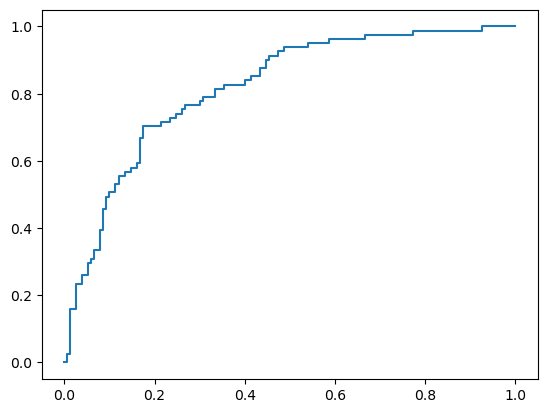

In [28]:
from sklearn.metrics import roc_curve
fpr,tpr,thres=roc_curve(ytest,ypredproba)
plt.plot(fpr,tpr)

4 matches					P(W)		P(L)			odds ration
w	w	w	w				1			0			1/0=infinity
w	w	L	L				0.5			0.5			1
L	L	L	L				0			1			0/1=0

0---------1------infi
log(0) ---log(1)----log(infi)
-infi 		1	infi



y=log p/ 1-p

mx+c= log p/1-p
e(mx+c) =p/1-P


if the missing data less than 3% then use drop na and delete the row
if the missing data is in range 3to40% use fill na to fill missing values also use simple includer
if missing vale greater than 40% then drop that column

cost function  used in linear regression is mse r mse ect but in logistic regression we have
binary cross entropy or log loss which is given by 

y== actual   Y_ = predicted value
then
-y log(y_) = (1-y) log (1-y_)

ROC ALC curve
receiver operator characteristics this plot true + plate verses false + rate
where 
specificity = tn/tn+fp 
to compute points in roc curve we need to evaluate logistic regression model many times with different 
threshold as roc is nothing but the probability curve so make this process we used AUC area under curve 
sensitivity and specificity are inversely proportional to one anther if we decreas threshold we get more ive value 
there increase AUc and degreasing specificity.

